# Task 4 : Exploratory Data Analysis - Terrorism

# GRIPMAY2021 - The Sparks Foundation - Data Science & Business Analytics Internship

# Author:BENABDELLAH RHOFRANE

In [1]:

#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:

# Let's import to our data and check the basics.
terror = pd.read_csv('Documents/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

E:\prog\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
terror.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
terror.shape

(181691, 135)

In [7]:

terror.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [8]:
#Renaming the columns 

terror.rename(columns = {'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country_Name',
                   'provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                   'weaptype1_txt':'Weapon_type','motive':'Motive','city':'City','latitude':'Latitude','longitude':'Longitude'} , inplace = True)

In [9]:
#using necessary columns for data analysis and deleting the rest
terror  = terror[['Year','Month','Extended','Day','Country_Name','State','Region','City','Latitude','Longitude',
                 'AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [11]:

terror.head()

,Year,Month,Extended,Day,Country_Name,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [12]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Year          181691 non-null  int64  
 1   Month         181691 non-null  int64  
 2   Extended      181691 non-null  int64  
 3   Day           181691 non-null  int64  
 4   Country_Name  181691 non-null  object 
 5   State         181270 non-null  object 
 6   Region        181691 non-null  object 
 7   City          181257 non-null  object 
 8   Latitude      177135 non-null  float64
 9   Longitude     177134 non-null  float64
 10  AttackType    181691 non-null  object 
 11  Killed        171378 non-null  float64
 12  Wounded       165380 non-null  float64
 13  Target        181055 non-null  object 
 14  Summary       115562 non-null  object 
 15  Group         181691 non-null  object 
 16  Target_type   181691 non-null  object 
 17  Weapon_type   181691 non-null  object 
 18  Moti

In [13]:
# Checking the null velues in data
terror.isnull().sum()

Year                 0
Month                0
Extended             0
Day                  0
Country_Name         0
State              421
Region               0
City               434
Latitude          4556
Longitude         4557
AttackType           0
Killed           10313
Wounded          16311
Target             636
Summary          66129
Group                0
Target_type          0
Weapon_type          0
Motive          131130
dtype: int64

In [14]:
terror['Wounded'] = terror['Wounded'].fillna(0)  #fillna to replace NaN values with 0
terror['Killed'] = terror['Killed'].fillna(0)


In [15]:

#creating new column casualties having data of killed and Wounded
terror['Casualties'] = terror['Killed'] + terror['Wounded']

In [19]:
terror.describe()

,Year,Month,Extended,Day,Latitude,Longitude,Killed,Wounded,Casualties
count,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,0.045346,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,0.208063,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,0.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,0.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,0.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,1.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


In [21]:
#checking the correlation
terror.corr()

,Year,Month,Extended,Day,Latitude,Longitude,Killed,Wounded,Casualties
Year,1.000000,0.000139,0.091754,0.018254,0.166933,0.003917,0.021252,0.017484,0.020675
Month,0.000139,1.000000,-0.000468,0.005497,-0.015978,-0.003880,0.004031,0.003178,0.003805
Extended,0.091754,-0.000468,1.000000,-0.004700,-0.024749,0.000523,0.014586,-0.010175,-0.004570
Day,0.018254,0.005497,-0.004700,1.000000,0.003423,-0.002285,-0.003225,-0.001082,-0.001808
Latitude,0.166933,-0.015978,-0.024749,0.003423,1.000000,0.001463,-0.013170,0.015920,0.009899
Longitude,0.003917,-0.003880,0.000523,-0.002285,0.001463,1.000000,-0.000587,0.000205,0.000013
Killed,0.021252,0.004031,0.014586,-0.003225,-0.013170,-0.000587,1.000000,0.443326,0.651885
Wounded,0.017484,0.003178,-0.010175,-0.001082,0.015920,0.000205,0.443326,1.000000,0.968724
Casualties,0.020675,0.003805,-0.004570,-0.001808,0.009899,0.000013,0.651885,0.968724,1.000000


# Checking attacks in years

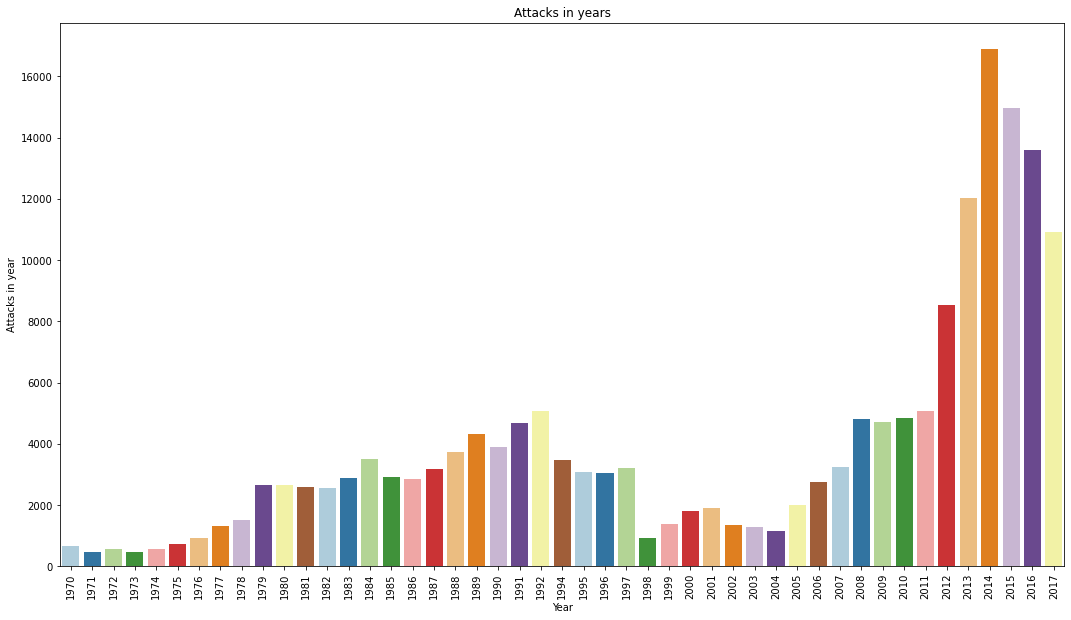

In [22]:
Year_data = terror['Year'].value_counts().sort_values() #to print attack counts in all years

#Visualizing the data
plt.figure(figsize= (18,10))
sns.barplot(x = Year_data.index , y = Year_data.values,palette="Paired")
plt.title('Attacks in years')
plt.xlabel('Year')
plt.ylabel('Attacks in year')
plt.xticks(rotation = 90)
plt.show()

# Countries with most attacks

In [24]:

# 10 countries with most attacks
Country_terror = terror['Country_Name'].value_counts().nlargest(n=10)
Country_terror

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country_Name, dtype: int64

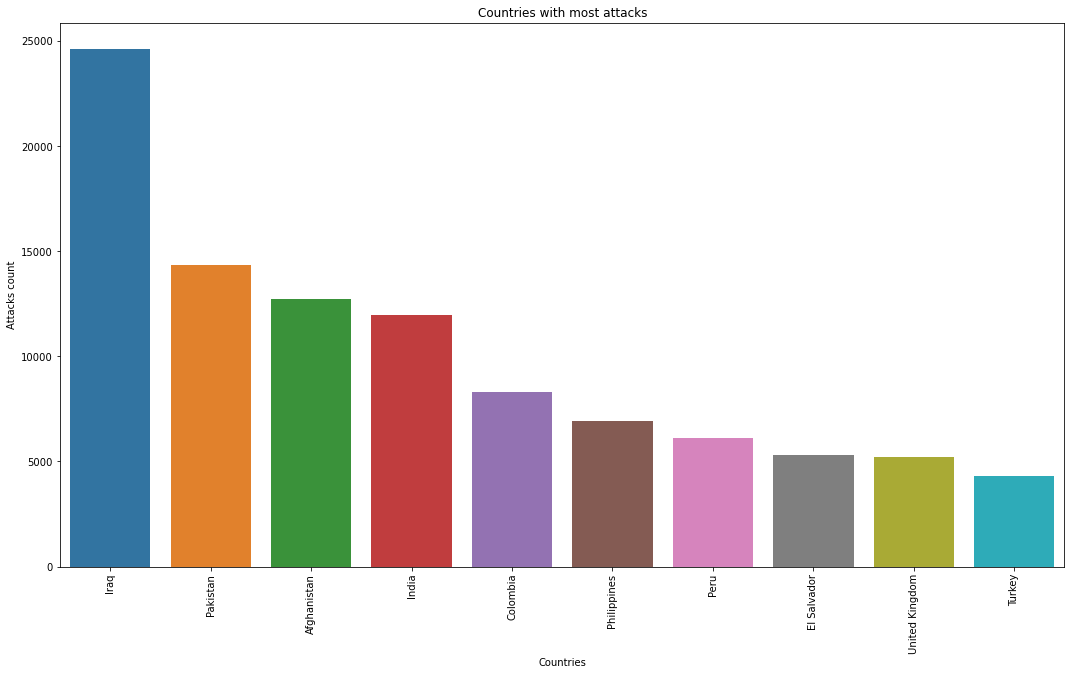

In [25]:

plt.figure(figsize= (18,10))
sns.barplot(x = Country_terror.index , y = Country_terror.values)
plt.title('Countries with most attacks')
plt.xlabel('Countries')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

# States with most attacks

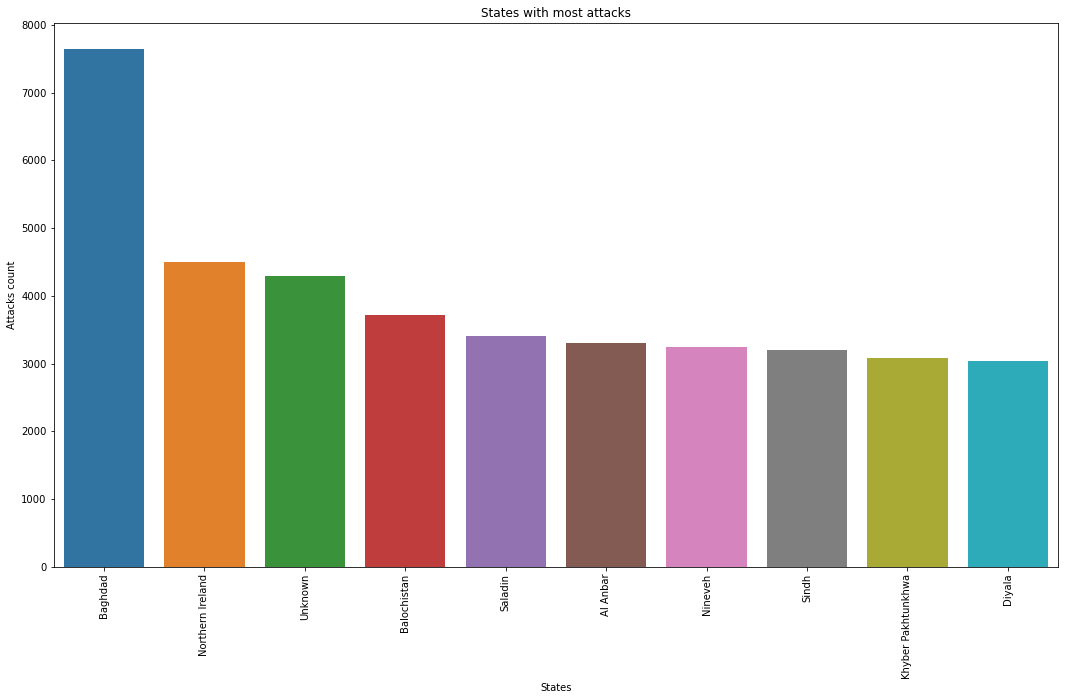

In [26]:
# 10 States with most attacks
State_terror = terror['State'].value_counts().nlargest(n=10)
#Visualization
plt.figure(figsize= (18,10))
sns.barplot(x = State_terror.index , y = State_terror.values)
plt.title('States with most attacks')
plt.xlabel('States')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

# Cities with most attacks

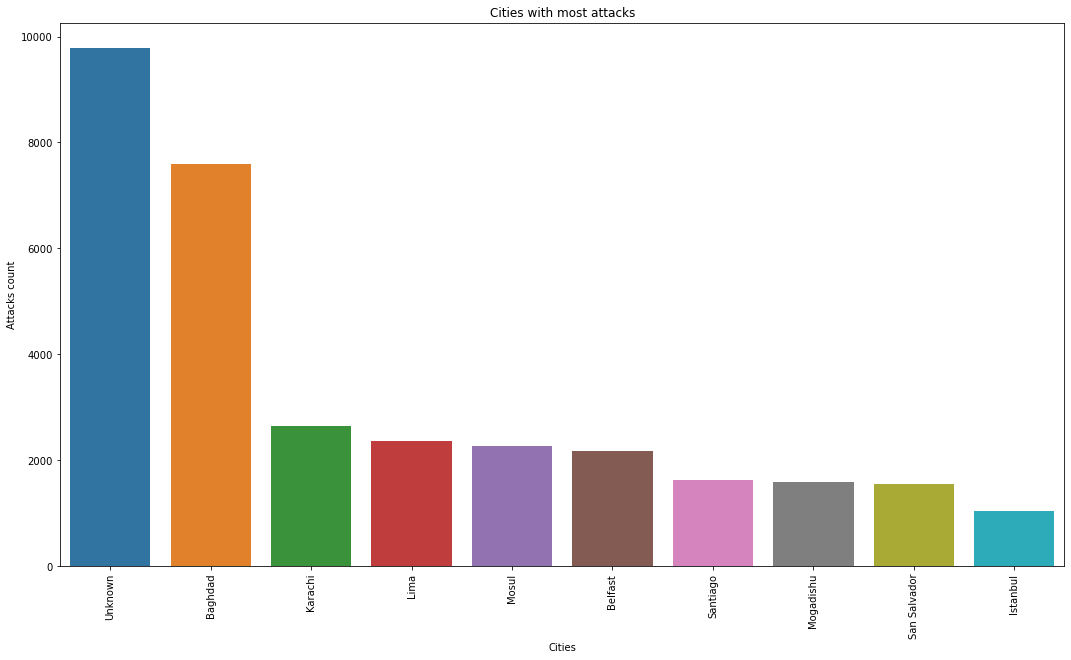

In [28]:
City_data = terror['City'].value_counts().nlargest(n=10)

#Visualization
plt.figure(figsize= (18,10))
sns.barplot(x = City_data.index , y = City_data.values)
plt.title('Cities with most attacks')
plt.xlabel('Cities')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

# Region with most attacks

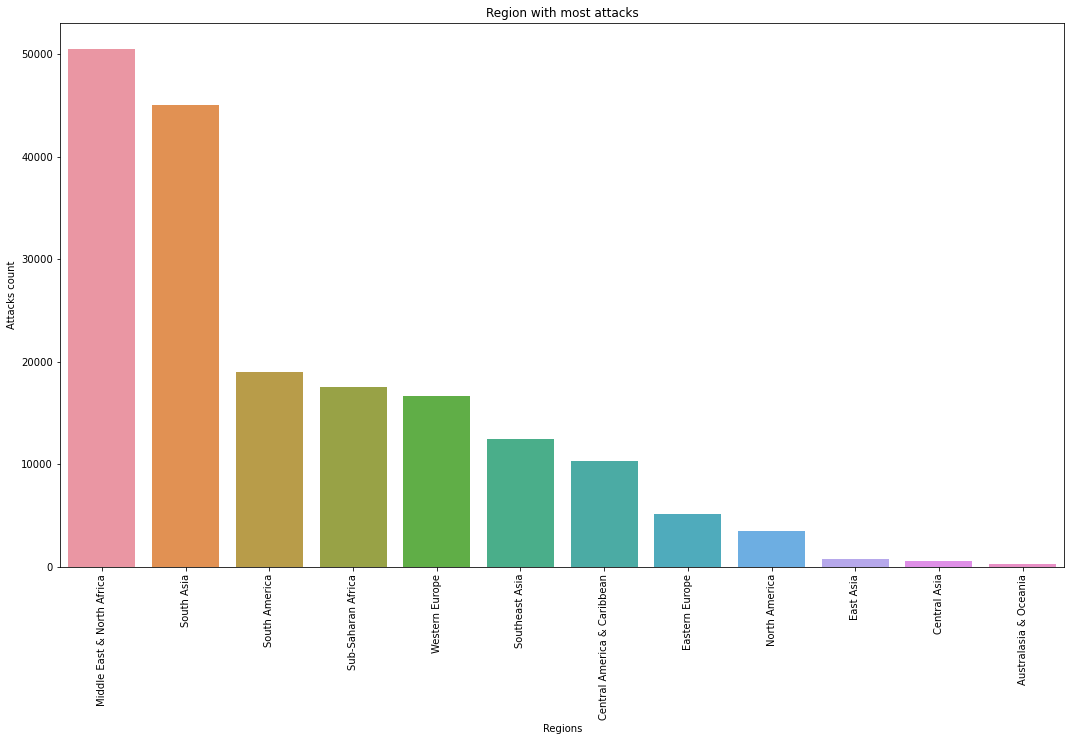

In [29]:
# 15 States with most attacks
Region_data = terror['Region'].value_counts()

#Visualization
plt.figure(figsize= (18,10))
sns.barplot(x = Region_data.index , y = Region_data.values)
plt.title('Region with most attacks')
plt.xlabel('Regions')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

# Most used Attack type

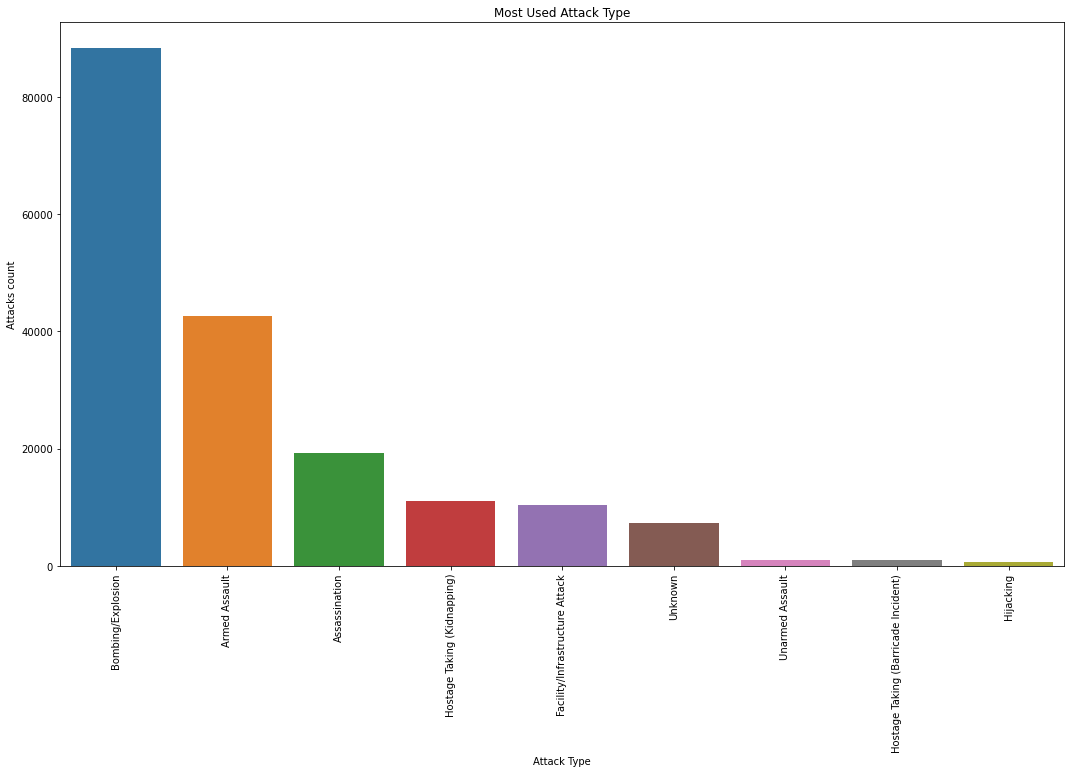

In [30]:
# Most frequent attck type
Attack_data = terror['AttackType'].value_counts()
#Visualization
plt.figure(figsize= (18,10))
sns.barplot(x = Attack_data.index , y = Attack_data.values)
plt.title('Most Used Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

E:\prog\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


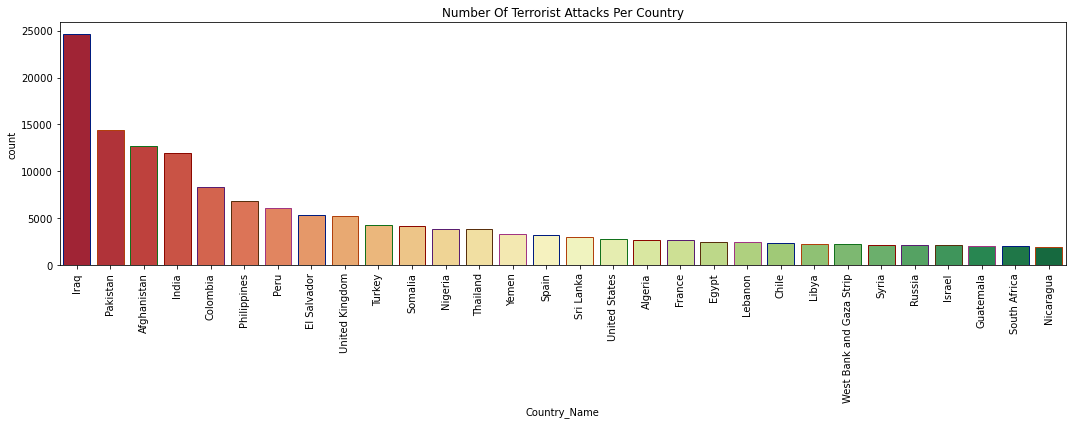

In [39]:
# Number Of Terrorist Attacks Per Country 
plt.subplots(figsize=(15,6))
sns.countplot('Country_Name',data=terror,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=terror['Country_Name'].value_counts()[:30].index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Attacks Per Country')
plt.tight_layout()

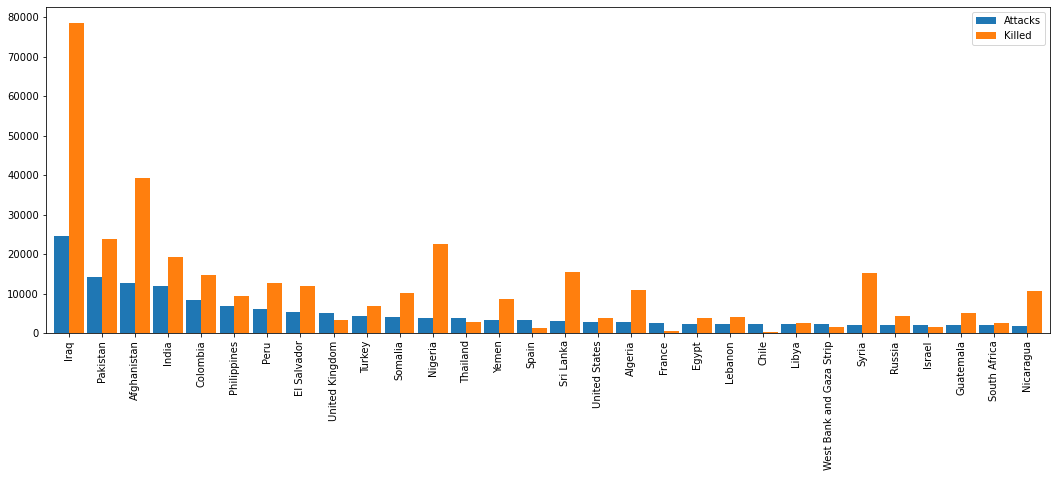

In [42]:

# Counts of Attacks vs Killed
count_terror=terror['Country_Name'].value_counts()[:30].to_frame()
count_terror.columns=['Attacks']
count_kill=terror.groupby('Country_Name')['Killed'].sum().to_frame()
count_terror.merge(count_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)

Text(0.5, 1.0, 'Terrorist Groups with Highest Terror Attacks')

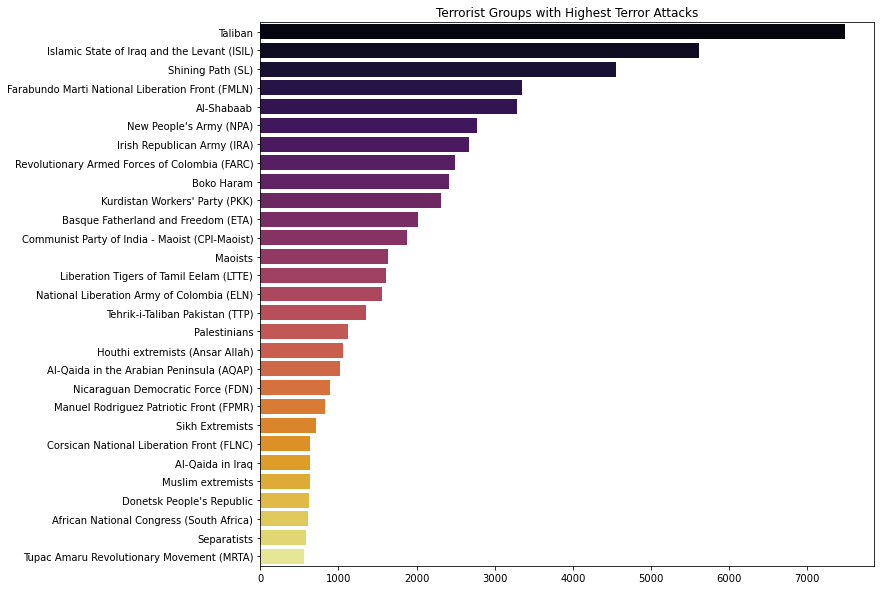

In [44]:

# Terrorist Groups with Highest Terror Attacks
plt.subplots(figsize=(11,10))
sns.barplot(y=terror['Group'].value_counts()[1:30].index,x=terror['Group'].value_counts()[1:30].values,
           palette='inferno')
plt.title('Terrorist Groups with Highest Terror Attacks')

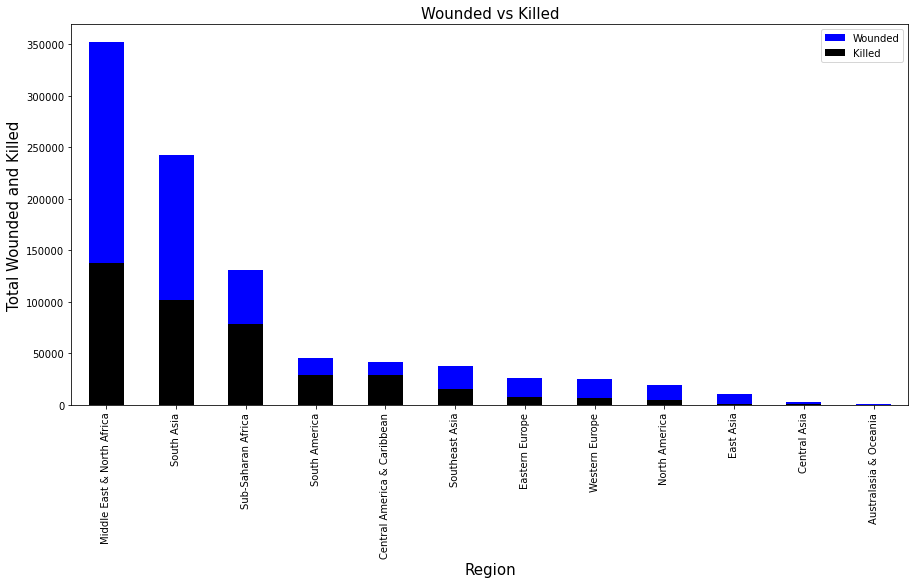

In [47]:
# Wounded vs Killed with respect to Region
Casualty = terror.groupby('Region').sum()['Casualties'].nlargest(n=15) #top 15 states with highest sales
killed = terror.groupby('Region').sum()['Killed'].nlargest(n=15) #top 15 states with highest sales
# plt.style.use('seaborn')
Casualty.plot(kind='bar', figsize=(15,7),fontsize = 10, color = 'blue', label = 'Wounded')
killed.plot(kind='bar', figsize=(15,7),fontsize = 10 , color='black', label = 'Killed')
plt.xlabel('Region',fontsize = 15)
plt.legend()
plt.ylabel('Total Wounded and Killed',fontsize = 15)
plt.title("Wounded vs Killed",fontsize = 15)
plt.show()

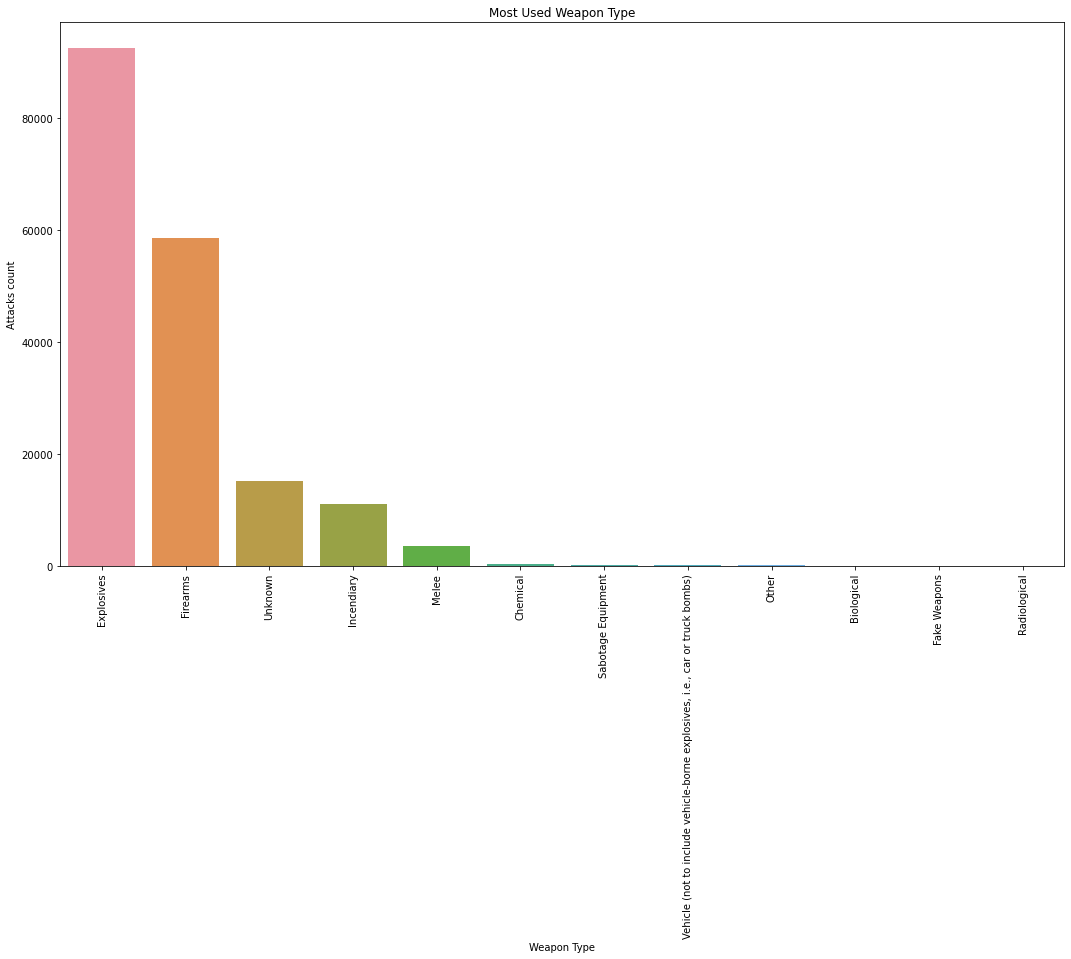

In [48]:

Weapon_data = terror['Weapon_type'].value_counts()
#Visualization
plt.figure(figsize= (18,10))
sns.barplot(x = Weapon_data.index , y = Weapon_data.values)
plt.title('Most Used Weapon Type')
plt.xlabel('Weapon Type')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

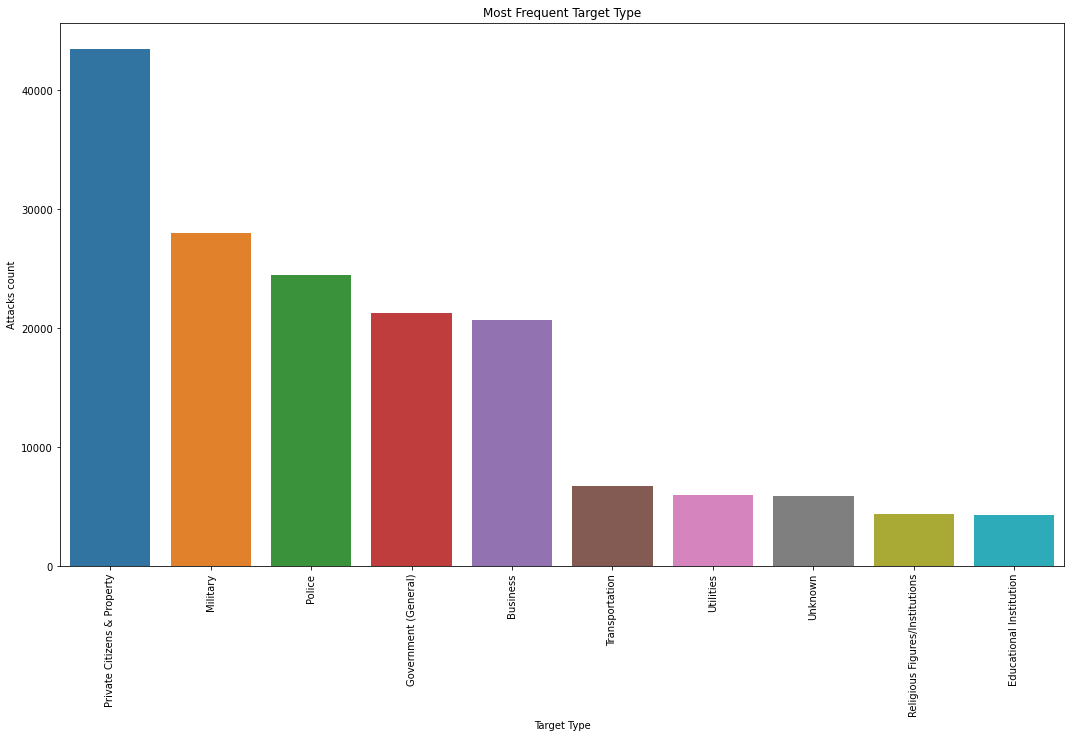

In [51]:
Target_data = terror['Target_type'].value_counts().nlargest(n=10)
#Visualization
plt.figure(figsize= (18,10))
sns.barplot(x = Target_data.index , y = Target_data.values)
plt.title('Most Frequent Target Type')
plt.xlabel('Target Type')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

In [50]:

print("Country with the most attacks:",terror['Country_Name'].value_counts().idxmax())

print("Region with the most attacks:",terror['Region'].value_counts().idxmax())
print("Year with the most attacks:",terror['Year'].value_counts().idxmax())
print("Month with the most attacks:",terror['Month'].value_counts().idxmax())
print("Group with the most attacks:",terror['Group'].value_counts().index[1])
print("Most Attack Types:",terror['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion
